In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

import tensorflow as tf
from sklearn.model_selection import train_test_split #Fungsi utk membagi dataset menjadi data training dan test

# Data Explanation

In [2]:
# Read Data
df = pd.read_csv('ggplay.csv')#, encoding = "ISO-8859-1")
df#.head()

reviewId  \
0      gp:AOqpTOFfVB-ecjLtidhryYJFhh4T0Z1KDzcs-WaGqb8...   
1      gp:AOqpTOFgnPyjzAh6XXZKgBigKp2IIfzoOKSlxiN-Igw...   
2      gp:AOqpTOGuj97RQy6mgaT1SV-8s5lxm2jK9ZiAHS1fAgE...   
3      gp:AOqpTOHdA2lJTQACd2sEqh73r-5ow4_40SZaeKfABDM...   
4      gp:AOqpTOGoM9YMrnunBDtgTyY1HuFqMiCCb5euqKFhLhG...   
...                                                  ...   
14395  gp:AOqpTOGe4EzVlFtrhYK_3Kq1Ac7x5B9uC65DPKylFou...   
14396  gp:AOqpTOEU4Hl4hFR7dPhJqmXWVaK665pV_eL0XUJtYOF...   
14397  gp:AOqpTOEBvDTvuzHXNKxX69jp3YaetjktIxR7nQNRcYz...   
14398  gp:AOqpTOFltmgvCwjmHxSxud-qON7Bbic8-3XyDEAuVX9...   
14399  gp:AOqpTOHcUysSrp0ykJDyRLJl25V-6w_mzppA0N-fwJa...   

                          userName  \
0                  Vian Alfiansyah   
1                  Afrizal Santoso   
2      Ekki Budiansyah Putri utami   
3                   Syofriwan Hadi   
4                Imas Siti masitoh   
...                            ...   
14395                  Ayah Azizah   
14396              Mulyani Mulyani   
14397                Desi.M Chanel   
14398                  arinta sasa   
14399           slogohimo wonogiri   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/AATXAJ...   
1      https://play-lh.googleusercontent.com/a-/AOh14...   
2      https://play-lh.googleusercontent.com/a-/AOh14...   
3      https://play-lh.googleusercontent.com/a-/AOh14...   
4      https://play-lh.googleusercontent.com/a-/AOh14...   
...                                                  ...   
14395  https://play-lh.googleusercontent.com/a/AATXAJ...   
14396  https://play-lh.googleusercontent.com/a/AATXAJ...   
14397  https://play-lh.googleusercontent.com/a/AATXAJ...   
14398  https://play-lh.googleusercontent.com/a-/AOh14...   
14399  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                 content  score  \
0      Hay OVO..Gak usah banyak gaya ingin kerja sama...      1   
1      Sungguh bikin kesal, saya dari kemarin beli pa...      1   
2      Ga guna banget nih aplikasi. Sekarang susah ba...      1   
3      banyak respon negatif dari user 😂😂😂 *top up bi...      1   
4      Ini gimana yah ko insentif saya belum cair? Pd...      1   
...                                                  ...    ...   
14395  sangat membantu,maaf kak aplikasi d dana saya ...      5   
14396                                                 ok      5   
14397                                               baik      5   
14398    Di update gak tambah bagus malah tambah lelet 👎      5   
14399                                            membatu      5   

       thumbsUpCount reviewCreatedVersion                   at  \
0                 82               3.42.0  2021-09-08 13:19:16   
1                  4               3.42.0  2021-09-09 11:23:41   
2                  1               3.42.0  2021-09-09 19:20:05   
3                 28               3.42.0  2021-09-07 07:58:40   
4                 25               3.42.0  2021-09-07 06:07:20   
...              ...                  ...                  ...   
14395              0                2.2.0  2021-09-10 19:49:43   
14396              0                2.1.1  2021-09-10 19:47:52   
14397              0                2.2.0  2021-09-10 19:47:26   
14398              0                2.2.0  2021-09-10 19:46:37   
14399              0               1.37.0  2021-09-10 19:46:25   

                                            replyContent            repliedAt  \
0      Hai Kak Vian, mohon maaf atas ketidaknyamanann...  2021-09-08 13:36:41   
1      Hai Kak Afrizal, mohon maaf atas ketidaknyaman...  2021-09-09 11:29:46   
2      Hai Kak Ekki, mohon maaf atas ketidaknyamanann...  2021-09-09 19:25:21   
3      Hai Kak Syofriwan, mohon maaf atas ketidaknyam...  2021-09-07 08:09:21   
4      Hai Kak, mohon maaf atas ketidaknyamanannya, a...  2021-09-07 06:18:09   
...                                                  ...         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              14400 non-null  object
 1   userName              14400 non-null  object
 2   userImage             14400 non-null  object
 3   content               14400 non-null  object
 4   score                 14400 non-null  int64 
 5   thumbsUpCount         14400 non-null  int64 
 6   reviewCreatedVersion  12537 non-null  object
 7   at                    14400 non-null  object
 8   replyContent          13026 non-null  object
 9   repliedAt             13026 non-null  object
 10  appId                 14400 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


**Data Explanation** :
data review ini saya peroleh dari google play store dengan menerapkan teknik webscraping menggunakan tools, google-play-scraper, data yang di peroleh berjumlah 14.400 baris dan 11 kolom  yang diantaara kolomnya itu adalah :
 - reviewId  : reviewId ini berisikan informasi lengkap tentang riview itu sendiri
 - userName  : kolom ini ber-isikan nama yang memberikan review pada aplikasi
 - userImage : kolom ini ber-isikan foto yang memberikan review pada aplikasi
 - content   : kolom ini ber-isikan isi content review dari setiap pengguna
 - score     : kolom ini adalah rating bintang yang diberikan pengguna pada aplikasi (1 - 5)
 - thumbsUpCount : kolom ini adalah jumlah like yang mendukung dari content riview pengguna lain
 - reviewCreatedVersion : kolom ini ber-isikan versi aplikasi yang digunakan pada pengguna
 - at : kolom ini ber-isikan tanggal dari pelanggan yang memberikan komentar pada aplikasi
 - replyContent :  kolom ini ber-isikan isi content balasan dari admin aplikasi
 - repliedAt : kolom ini ber-isikan tanggal dari admin aplikasi yang memberikan komentar balik terhadap komentar pengguna
 - appId : pada kolom ini ber isikan aplikasi yang digunakan oleh pengguna (ovo.id / id.dana)

In [4]:
df.shape

(14400, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              14400 non-null  object
 1   userName              14400 non-null  object
 2   userImage             14400 non-null  object
 3   content               14400 non-null  object
 4   score                 14400 non-null  int64 
 5   thumbsUpCount         14400 non-null  int64 
 6   reviewCreatedVersion  12537 non-null  object
 7   at                    14400 non-null  object
 8   replyContent          13026 non-null  object
 9   repliedAt             13026 non-null  object
 10  appId                 14400 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


# Data Cleansing & EDA.

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1863
at                         0
replyContent            1374
repliedAt               1374
appId                      0
dtype: int64
reviewId                 0.000000
userName                 0.000000
userImage                0.000000
content                  0.000000
score                    0.000000
thumbsUpCount            0.000000
reviewCreatedVersion    12.937500
at                       0.000000
replyContent             9.541667
repliedAt                9.541667
appId                    0.000000
dtype: float64


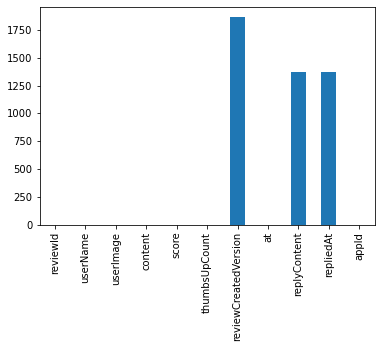

In [6]:
#Check Missing Value and Finding the missing percentage
import matplotlib.pyplot as plt
df.isna().sum().plot(kind="bar");
missing_values_sum = df.isna().sum()
print(missing_values_sum)
missing_values_percent = df.isna().mean()*100
print(missing_values_percent)

The researcher may leave the data or do data imputation to replace the them. Suppose the number of cases of missing values is extremely small; then, an expert researcher may drop or omit those values from the analysis. In statistical language, if the number of the cases is less than 5% of the sample, then the researcher can drop them.

In the case of multivariate analysis, if there is a larger number of missing values, then it can be better to drop those cases (rather than do imputation) and replace them. On the other hand, in univariate analysis, imputation can decrease the amount of bias in the data, if the values are missing at random. https://www.statisticssolutions.com/missing-values-in-data/

In this case the data we have is 14.400 and the most missing data in the town column as much as 1.863 or 12.9% of the total data, This does not really matter, considering the amount of data you have compared to the missing data. Next we will delete all columns that have missing values (NA) and columns that are not needed in data exploration, because these columns are not relevant to enter the next data exploration stage.

In [7]:
# Drop columns
df.drop(columns=['userImage','reviewCreatedVersion','repliedAt'], inplace=True)

In [8]:
df.head()

reviewId  \
0  gp:AOqpTOFfVB-ecjLtidhryYJFhh4T0Z1KDzcs-WaGqb8...   
1  gp:AOqpTOFgnPyjzAh6XXZKgBigKp2IIfzoOKSlxiN-Igw...   
2  gp:AOqpTOGuj97RQy6mgaT1SV-8s5lxm2jK9ZiAHS1fAgE...   
3  gp:AOqpTOHdA2lJTQACd2sEqh73r-5ow4_40SZaeKfABDM...   
4  gp:AOqpTOGoM9YMrnunBDtgTyY1HuFqMiCCb5euqKFhLhG...   

                      userName  \
0              Vian Alfiansyah   
1              Afrizal Santoso   
2  Ekki Budiansyah Putri utami   
3               Syofriwan Hadi   
4            Imas Siti masitoh   

                                             content  score  thumbsUpCount  \
0  Hay OVO..Gak usah banyak gaya ingin kerja sama...      1             82   
1  Sungguh bikin kesal, saya dari kemarin beli pa...      1              4   
2  Ga guna banget nih aplikasi. Sekarang susah ba...      1              1   
3  banyak respon negatif dari user 😂😂😂 *top up bi...      1             28   
4  Ini gimana yah ko insentif saya belum cair? Pd...      1             25   

                    at                                       replyContent  \
0  2021-09-08 13:19:16  Hai Kak Vian, mohon maaf atas ketidaknyamanann...   
1  2021-09-09 11:23:41  Hai Kak Afrizal, mohon maaf atas ketidaknyaman...   
2  2021-09-09 19:20:05  Hai Kak Ekki, mohon maaf atas ketidaknyamanann...   
3  2021-09-07 07:58:40  Hai Kak Syofriwan, mohon maaf atas ketidaknyam...   
4  2021-09-07 06:07:20  Hai Kak, mohon maaf atas ketidaknyamanannya, a...   

    appId  
0  ovo.id  
1  ovo.id  
2  ovo.id  
3  ovo.id  
4  ovo.id

In [9]:
# Convert 'at' feature to date time then takeout hours and minutes.
df['at'] = pd.to_datetime(df['at'])
df['date'] = df['at'].dt.strftime("%Y-%m-%d")
df.drop(columns=['at'], inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.head()

reviewId  \
0  gp:AOqpTOFfVB-ecjLtidhryYJFhh4T0Z1KDzcs-WaGqb8...   
1  gp:AOqpTOFgnPyjzAh6XXZKgBigKp2IIfzoOKSlxiN-Igw...   
2  gp:AOqpTOGuj97RQy6mgaT1SV-8s5lxm2jK9ZiAHS1fAgE...   
3  gp:AOqpTOHdA2lJTQACd2sEqh73r-5ow4_40SZaeKfABDM...   
4  gp:AOqpTOGoM9YMrnunBDtgTyY1HuFqMiCCb5euqKFhLhG...   

                      userName  \
0              Vian Alfiansyah   
1              Afrizal Santoso   
2  Ekki Budiansyah Putri utami   
3               Syofriwan Hadi   
4            Imas Siti masitoh   

                                             content  score  thumbsUpCount  \
0  Hay OVO..Gak usah banyak gaya ingin kerja sama...      1             82   
1  Sungguh bikin kesal, saya dari kemarin beli pa...      1              4   
2  Ga guna banget nih aplikasi. Sekarang susah ba...      1              1   
3  banyak respon negatif dari user 😂😂😂 *top up bi...      1             28   
4  Ini gimana yah ko insentif saya belum cair? Pd...      1             25   

                                        replyContent   appId       date  
0  Hai Kak Vian, mohon maaf atas ketidaknyamanann...  ovo.id 2021-09-08  
1  Hai Kak Afrizal, mohon maaf atas ketidaknyaman...  ovo.id 2021-09-09  
2  Hai Kak Ekki, mohon maaf atas ketidaknyamanann...  ovo.id 2021-09-09  
3  Hai Kak Syofriwan, mohon maaf atas ketidaknyam...  ovo.id 2021-09-07  
4  Hai Kak, mohon maaf atas ketidaknyamanannya, a...  ovo.id 2021-09-07

In [10]:
# Line plot based on Date
import plotly.express as px
line_data = df.groupby(['date','appId']).mean().reset_index()

fig = px.line(line_data, x="date", y="score", color='appId', 
              title='Time Series Relationship for the average rating per day')
fig.show()

Dari plot diatas kita dapat mengetahui bahwa kita tidak memiliki ketersediaan data pada id.dana, yang dimana seharusnya secara keseluruhan data yang di ambil ini merupakan data kurang lebih selama 2 kuartil, maka dari itu kita tidak dapat menarik kesimpulan apapun terhadap line plot diatas, oleh karna itu untuk kebutuhan eksplorasi data di tahap selanjutnya, saya akan mengambil data dari 16juni2021 sampai 7 september saja untuk data pada kedua aplikasi ini.

In [11]:
# Filtering date feature from 16 june until 11 sept 2021
df = df[df['date'] >= '2021-06-16']
df.head()

reviewId  \
0  gp:AOqpTOFfVB-ecjLtidhryYJFhh4T0Z1KDzcs-WaGqb8...   
1  gp:AOqpTOFgnPyjzAh6XXZKgBigKp2IIfzoOKSlxiN-Igw...   
2  gp:AOqpTOGuj97RQy6mgaT1SV-8s5lxm2jK9ZiAHS1fAgE...   
3  gp:AOqpTOHdA2lJTQACd2sEqh73r-5ow4_40SZaeKfABDM...   
4  gp:AOqpTOGoM9YMrnunBDtgTyY1HuFqMiCCb5euqKFhLhG...   

                      userName  \
0              Vian Alfiansyah   
1              Afrizal Santoso   
2  Ekki Budiansyah Putri utami   
3               Syofriwan Hadi   
4            Imas Siti masitoh   

                                             content  score  thumbsUpCount  \
0  Hay OVO..Gak usah banyak gaya ingin kerja sama...      1             82   
1  Sungguh bikin kesal, saya dari kemarin beli pa...      1              4   
2  Ga guna banget nih aplikasi. Sekarang susah ba...      1              1   
3  banyak respon negatif dari user 😂😂😂 *top up bi...      1             28   
4  Ini gimana yah ko insentif saya belum cair? Pd...      1             25   

                                        replyContent   appId       date  
0  Hai Kak Vian, mohon maaf atas ketidaknyamanann...  ovo.id 2021-09-08  
1  Hai Kak Afrizal, mohon maaf atas ketidaknyaman...  ovo.id 2021-09-09  
2  Hai Kak Ekki, mohon maaf atas ketidaknyamanann...  ovo.id 2021-09-09  
3  Hai Kak Syofriwan, mohon maaf atas ketidaknyam...  ovo.id 2021-09-07  
4  Hai Kak, mohon maaf atas ketidaknyamanannya, a...  ovo.id 2021-09-07

## Check Duplication Data

In [12]:
df_Josh = df[df['userName'] == 'Josh Heryadi']
df_Josh

reviewId      userName  \
4801  gp:AOqpTOEbJjRftb02BctDpr36C0JrotUu8ilYlyMO5Yn...  Josh Heryadi   
5542  gp:AOqpTOEbJjRftb02BctDpr36C0JrotUu8ilYlyMO5Yn...  Josh Heryadi   

                                                content  score  thumbsUpCount  \
4801  Sungguh aneh, dari awal punya akun OVO belum p...      4              4   
5542  Sungguh aneh, dari awal punya akun OVO belum p...      4              4   

                                           replyContent   appId       date  
4801  Hai Kak Heryadi,\nMohon maaf atas ketidaknyama...  ovo.id 2021-09-03  
5542  Hai Kak Heryadi,\nMohon maaf atas ketidaknyama...  ovo.id 2021-09-03

In [13]:
# Check Duplication Data
df.userName.duplicated().sum()

2103

In [14]:
# Check Duplication Data
df.content.duplicated().sum()

3131

In [15]:
# Drop Duplication Data
df = df.drop_duplicates(['content'])
df = df.drop_duplicates(['userName'])

In [16]:
df.shape

(10581, 8)

In [17]:
# Check Duplication Data after removing Duplication
df.content.duplicated().sum()
df.userName.duplicated().sum()

0

In [18]:
df_Josh = df[df['userName'] == 'Josh Heryadi']
df_Josh

reviewId      userName  \
4801  gp:AOqpTOEbJjRftb02BctDpr36C0JrotUu8ilYlyMO5Yn...  Josh Heryadi   

                                                content  score  thumbsUpCount  \
4801  Sungguh aneh, dari awal punya akun OVO belum p...      4              4   

                                           replyContent   appId       date  
4801  Hai Kak Heryadi,\nMohon maaf atas ketidaknyama...  ovo.id 2021-09-03

In [19]:
line_data_clean = df.groupby(['date','appId']).mean().reset_index()

fig = px.line(line_data_clean, x="date", y="score", color='appId',height=500, 
              title='Time Series Relationship for the average rating per day')
fig.show()

darisini kita bisa tarik kesimpulan bahwa rata-rata ratings pada ovo.id dan id.dana pada tanggal 16 juni sampai 6 agustus 2021 cukup statis di range 2.8 sampai 3.5, kemudian keduanya mengalami cukup penurunan dari 25 agustus sampai 11 september 2021.

In [20]:
# Donut Plot
d1 = df.groupby(['appId'])[['score']].sum().reset_index()
#Total Quantity
fig1 = px.bar(d1, x="appId", y="score", color='appId', orientation='v', height=500,
             title=' Total Ratings')
fig1.show()

Dari total ratings atau keseluruhan ratings yang diperoleh dana sedikit lebih banyak dibandingkan ovo, selisihnya di angka 4.251 ratings selama hampir satu kuartal.

## Text Cleansing

In [21]:
sample_text = df.loc[3]['content']

print(sample_text)

banyak respon negatif dari user 😂😂😂 *top up bisa esok hari masuk saldonya (udah ga jamannya kaya gini bos) *merchant nya susah..ga kaya aplikasi sebelah. bisa top up di alfa ato indomaret...yg gerainya ada dimana mana. padahal dulu bs topup di indomaret...(kok malah jadi mundur management nya ya...🤔)


dari contoh review diatas dapat terlihat bahwa masih banyak tanda baca dan emoticon serta terdapat sepasi dan titik berlebih maka dari itu pada tahap selanjutnya kita akan melakukan teks cleansing guna mempermudah dalam proses prediksi sentiment nantinya.

In [22]:
# melakukan regex(regural Expression)
import re
def proc_feature(features):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', features)
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()  
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    processed_feature = regrex_pattern.sub(r'',processed_feature)
    processed_feature = re.sub(r'[^\x00-\x7F]+',' ', processed_feature)
    return(processed_feature)

In [23]:
# data cleansing based on Regex
df['content_clean'] = df.content.apply(lambda x : proc_feature(x))
sample_text = df.loc[3]['content_clean']
print(sample_text)

banyak respon negatif dari user top up bisa esok hari masuk saldonya udah ga jamannya kaya gini bos merchant nya susah ga kaya aplikasi sebelah bisa top up di alfa ato indomaret yg gerainya ada dimana mana padahal dulu bs topup di indomaret kok malah jadi mundur management nya ya 


In [24]:
# Tokenizing Stopword & Stemming
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = ['dengan', 'ia', 'bahwa', 'oleh', 'di','kok', 'nya', 'ovo', 'dana','aplikasi','enggak','pakai','apa','apk','jadi','buka',
                  'sekarang','padahal','mau','terus','kalau','banyak','akun','masuk']
my_stp = stop_factory + more_stopwords
dictionary = ArrayDictionary(my_stp)
stopword = StopWordRemover(dictionary)

In [25]:
stopword.remove('pake dana')

'pake'

In [26]:
# import slang word
df_slang = pd.read_csv('twitter_dict.csv')
df_slang.head(2)

slang formal
0   woww    wow
1  aminn   amin

In [27]:
# Mengganti vocab yang mengandung slang ke vocab formal( Normalization)
def replace_slang(content_clean):
    content_clean = content_clean.lower()
    res = ''
    for item in content_clean.split():
        if item in df_slang.slang.values:
            res += df_slang[df_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

In [28]:
df['content_clean'] = df.content_clean.apply(replace_slang)
sample_text = df.loc[3]['content_clean']
print(sample_text)

banyak respon negatif dari user top up bisa esok hari masuk saldonya sudah enggak jamannya kayak begini bos merchant nya susah enggak kayak aplikasi sebelah bisa top up di alfa atau indomaret yang gerainya ada dimana mana padahal dulu bisa topup di indomaret kok malah jadi mundur management nya ya 


In [29]:
#Stopword
df['content_clean'] = df.content_clean.apply(lambda x : stopword.remove(x))
sample_text = df.loc[3]['content_clean']
print(sample_text)

respon negatif user top up esok hari saldonya jamannya kayak begini bos merchant susah enggak kayak sebelah top up alfa indomaret gerainya dimana mana dulu topup indomaret malah mundur management ya 


In [30]:
# Stemming
df['content_clean'] = df.content_clean.apply(lambda x : stemmer.stem(x))
sample_text = df.loc[3]['content_clean']
print(sample_text)

respon negatif user top up esok hari saldo jaman kayak begini bos merchant susah enggak kayak belah top up alfa indomaret gerai mana mana dulu topup indomaret malah mundur management ya


In [31]:
#df_tok = df_re.apply(lambda x : word_tokenize(x))
#sample_text = df_tok.loc[3]
#print(sample_text)

In [32]:
df.head()

reviewId  \
0  gp:AOqpTOFfVB-ecjLtidhryYJFhh4T0Z1KDzcs-WaGqb8...   
1  gp:AOqpTOFgnPyjzAh6XXZKgBigKp2IIfzoOKSlxiN-Igw...   
2  gp:AOqpTOGuj97RQy6mgaT1SV-8s5lxm2jK9ZiAHS1fAgE...   
3  gp:AOqpTOHdA2lJTQACd2sEqh73r-5ow4_40SZaeKfABDM...   
4  gp:AOqpTOGoM9YMrnunBDtgTyY1HuFqMiCCb5euqKFhLhG...   

                      userName  \
0              Vian Alfiansyah   
1              Afrizal Santoso   
2  Ekki Budiansyah Putri utami   
3               Syofriwan Hadi   
4            Imas Siti masitoh   

                                             content  score  thumbsUpCount  \
0  Hay OVO..Gak usah banyak gaya ingin kerja sama...      1             82   
1  Sungguh bikin kesal, saya dari kemarin beli pa...      1              4   
2  Ga guna banget nih aplikasi. Sekarang susah ba...      1              1   
3  banyak respon negatif dari user 😂😂😂 *top up bi...      1             28   
4  Ini gimana yah ko insentif saya belum cair? Pd...      1             25   

                                        replyContent   appId       date  \
0  Hai Kak Vian, mohon maaf atas ketidaknyamanann...  ovo.id 2021-09-08   
1  Hai Kak Afrizal, mohon maaf atas ketidaknyaman...  ovo.id 2021-09-09   
2  Hai Kak Ekki, mohon maaf atas ketidaknyamanann...  ovo.id 2021-09-09   
3  Hai Kak Syofriwan, mohon maaf atas ketidaknyam...  ovo.id 2021-09-07   
4  Hai Kak, mohon maaf atas ketidaknyamanannya, a...  ovo.id 2021-09-07   

                                       content_clean  
0  hai usah gaya kerja sama adira nampung prakerj...  
1  sungguh bikin kesal dari kemarin beli paket da...  
2  guna sangat nih sekarang susah sangat kalo tra...  
3  respon negatif user top up esok hari saldo jam...  
4  bagaimana kok insentif belum cair sudah lebih ...

### Check Corellation content between scores.

In [34]:
# check the correlation between content and score to determine what method is appropriate to determine the sentiment value
dff = df[df['userName']=='Faarraaaway yyy'] #ovo user
dff

reviewId         userName  \
5401  gp:AOqpTOHp0Pt62Z4vI-a7fytWbQxxjxK4rbShlG8IJC2...  Faarraaaway yyy   

                                      content  score  thumbsUpCount  \
5401  aplikasinya jelek insentif susah cair..      4              0   

                                           replyContent   appId       date  \
5401  Hai Kak, mohon maaf atas ketidaknyamanannya. A...  ovo.id 2021-09-11   

                           content_clean  
5401  aplikasi jelek insentif susah cair

In [42]:
sample_text = df.loc[5401]['content']
print(sample_text)

aplikasinya jelek insentif susah cair..


In [35]:
dfa = df[df['userName']=='weyanto tjandra'] #ovo user
dfa

reviewId         userName  \
6008  gp:AOqpTOG8yTArslm0sCzHZb7CVoHRl8VPV7nCswXmNMZ...  weyanto tjandra   

                                                content  score  thumbsUpCount  \
6008  Kurang bagus , sya buka sdh dua/tiga tahunan, ...      5              4   

     replyContent   appId       date  \
6008          NaN  ovo.id 2021-08-24   

                                          content_clean  
6008  kurang bagus buka dua tiga tahun sekarang puny...

In [41]:
sample_text = df.loc[6008]['content']
print(sample_text)

Kurang bagus , sya buka sdh dua/tiga tahunan, tapi skr sya punya ovo ga bisa dibuka, aneh tapi nyata. Sya pikir sdh mau bangkrut kali ,karena sdh tidak ada cash back dll.dan sya hanya mau buka ovo sya tapi tidak bisa. Sdh sya coba, tapi instal kembali ini dan itu, klu mau ambil saldo sya ga masalah, sya kehilangan saldo itu juga ga bakalan mati atau miskin kok.


In [43]:
dfmh = df[df['userName']=='Wahyudi Yusuf'] #dana user
dfmh

reviewId       userName  \
6  gp:AOqpTOH7fzTW7tmX0po1tQGnMjM8pTEN3Si78fcfTqQ...  Wahyudi Yusuf   

                                             content  score  thumbsUpCount  \
6  Dengan ada nya prakerja ini sangat membantu sa...      1              3   

                                        replyContent   appId       date  \
6  Hai Kak, mohon maaf atas ketidaknyamanannya. A...  ovo.id 2021-09-06   

                                       content_clean  diff_postneg  \
6  ada prakerja sangat bantu dalam ajar dapat tah...             7   

   sentscore_calculated  
6                     1

In [44]:
sample_text = df.loc[6]['content']
print(sample_text)

Dengan ada nya prakerja ini sangat membantu saya dalam hal belajar untuk mendapatkan pengetahuan baru. Bukan hanya saya, hal ini juga sangat bermanfaat untuk masyarakat luas. Akan tetapi saran saya hal ini hendaknya bisa lebih mendetail lagi terkait mengenai penjelasan dari awal sampai akhir pelatihan karena menurut saya penjelasannya belum terstruktur. Semoga apa yang disajikan saat ini bisa bermanfaat bagi semua kalangan yang membutuhkan dan kedepannya lebih memperbaiki skema pembelajaran yang


In [45]:
dfth = df[df['userName']=='Gumelar Surya'] #dana user
dfth

reviewId       userName  \
13208  gp:AOqpTOEz_MBAv9wdPsY2Yb2EpFey193RVYSNUmoT7aF...  Gumelar Surya   

                                                 content  score  \
13208  Akun dana nya kadang susah untuk dibuka padaha...      5   

       thumbsUpCount                                       replyContent  \
13208              4  Hi Kak, maaf buat kecewa. Terkait keluhan yg d...   

         appId       date                                      content_clean  \
13208  id.dana 2021-09-05  dana kadang susah buka baru update versi baru ...   

       diff_postneg  sentscore_calculated  
13208             1                     1

In [46]:
sample_text = df.loc[13208]['content']
print(sample_text)

Akun dana nya kadang susah untuk dibuka padahal baru saja update ke versi terbaru dan waktu itu pun sama tidak bisa dibuka sampei akhirnya kita hapus dulu apk lalu kita download ulang, masa kita harus terus hapus dan download lagi biar bisa buka akun DANA nya .. Tolong segera di perbaiki


Dari sini kita bisa amati berdasarkan dari score bintang yang di berikan, kita tidak bisa serta merta mengatakan bahwa score yang tinggi menandakan komentar yang positif, sebagai contoh dari gambar sebelah pengguna aplikasi ini memberikan komentar yang cukup untuk dia memberikan score negatif, atau kurang dari 3 karna masalah yang dia alami, namun faktanya score yang diberikan adalah 5, hal ini akan menjadi ambigu jika kita menilai sentimentnya berdasarkan score bintang yang diberikan, maka dari hal ini akan lebih objective jika kita menentukan nilai sentimen nya berdasarkan komentar itu sendiri.

## Calculate Sentiment Score Based on riochr17 sentiment dictionary.

In [37]:
#Load data list kata bersentimen negatif
neg_file=pd.read_csv('https://github.com/riochr17/Analisis-Sentimen-ID/raw/master/data/negatif.txt',header=None,delimiter='\t').values
neg_file=list(neg_file.reshape(neg_file.shape[0],))

#Load data list kata bersentimen positif
pst_file=pd.read_csv('https://github.com/riochr17/Analisis-Sentimen-ID/raw/master/data/positif.txt',header=None,delimiter='\t').values
pst_file=list(pst_file.reshape(pst_file.shape[0],))

#Pada bagian ini, dihitung jumlah kata negatif dan positif masing-masing kalimat berdasarkan list kata pada neg_file dan pst_file

post_words_count=df.content_clean.apply(lambda x: len([w for w in x.split(' ') if w in pst_file]))
neg_words_count=df.content_clean.apply(lambda x: len([w for w in x.split(' ') if w in neg_file]))

#Menghitung skor sentimen, selisih jml kata positif dan negatif
df['diff_postneg']=(post_words_count-neg_words_count)
#Memberi sign utk selisih <0 -1, >0 1, dan =0 0
df['sentscore_calculated']=df['diff_postneg'].apply(lambda x: 1 if x>0 else -1 if x<0 else 0)

In [47]:
df_ovo = df[df['appId'] == 'ovo.id']
df_dana =df[df['appId'] == 'id.dana']

In [55]:
# Donut Plot
sent = df_ovo.groupby(['sentscore_calculated'])[['score']].sum().reset_index()
fig = px.pie(sent, values='score', names='sentscore_calculated',hole=.5,height=500, 
             title='Total Sentiment Score OVO',color_discrete_sequence=px.colors.sequential.RdBu)
# Donut Plot
sent1 = df_dana.groupby(['sentscore_calculated'])[['score']].sum().reset_index()
fig1 = px.pie(sent, values='score', names='sentscore_calculated',hole=.5,height=500, 
             title='Total Sentiment Score DANA',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
fig1.show()

Donut plot menyimpulkan bahwa sentiment positif dana lebih banyak 3% dibandingkan ovo namun sentiment negatifnya ovo lebih banyak 1% dibandingkan ovo selama 16 juni sampai 11 september 2021, lalu kata-kata yang bersentiment positive yang sering muncul dari kedua aplikasi ini transaksi,transfer,bagus,baik,saldo,mudah sedangkan untuk kata yang sering muncul pada sentiment negative adalah uang,gagal,kecewa,lama,susah.

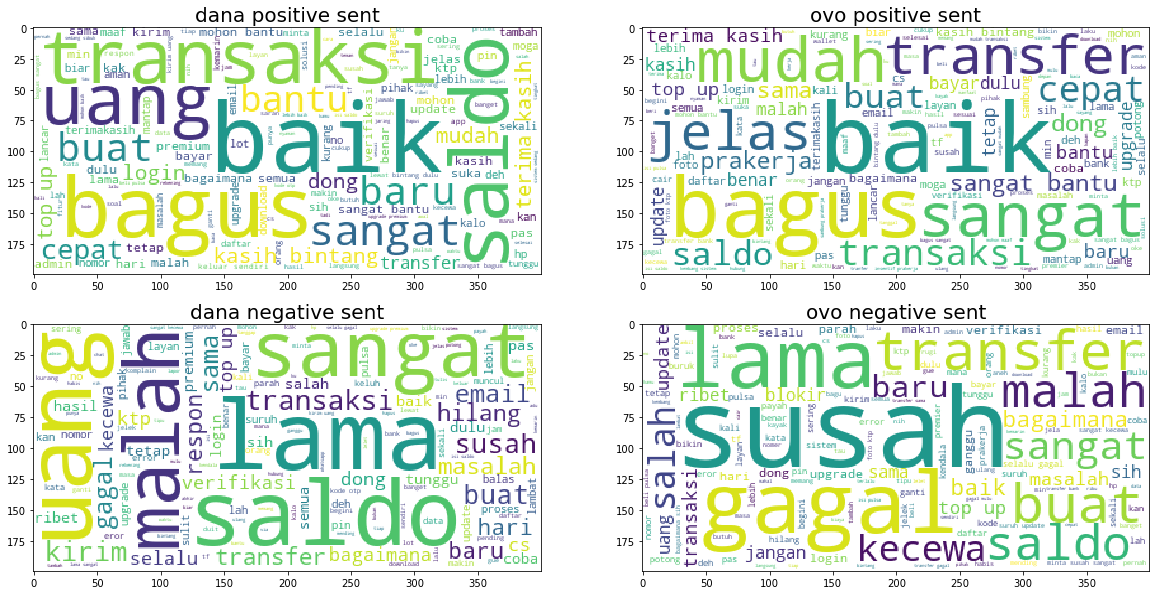

In [53]:
from wordcloud import WordCloud, STOPWORDS
# BA

#stopwords = set(STOPWORDS)
cc_ovo_neg = df[(df['appId'] == 'ovo.id') & (df['sentscore_calculated'] == -1)]['content_clean']
ovo_neg = WordCloud(
    background_color='white',
    max_words=150,
    stopwords=my_stp,
    random_state = 99
)
ovo_neg.generate(' '.join(cc_ovo_neg))

# DE
stopwords = set(STOPWORDS)
cc_dana_neg = df[(df['appId'] == 'id.dana') & (df['sentscore_calculated'] == -1)]['content_clean']
dana_neg = WordCloud(
    background_color='white',
    max_words=150,
    stopwords=my_stp,
    random_state = 99
)
dana_neg.generate(' '.join(cc_dana_neg))

# BA
stopwords = set(STOPWORDS)
cc_ovo_post = df[(df['appId'] == 'ovo.id') & (df['sentscore_calculated'] == 1)]['content_clean']
ovo_post = WordCloud(
    background_color='white',
    max_words=150,
    stopwords=my_stp,
    random_state = 99
)
ovo_post.generate(' '.join(cc_ovo_post))

# DE
stopwords = set(STOPWORDS)
cc_dana_post = df[(df['appId'] == 'id.dana') & (df['sentscore_calculated'] == 1)]['content_clean']
dana_post = WordCloud(
    background_color='white',
    max_words=150,
    stopwords=my_stp,
    random_state = 99
)
dana_post.generate(' '.join(cc_dana_post))

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 4)
plt.imshow(ovo_neg, interpolation='nearest', aspect='auto')
plt.title('ovo negative sent', fontsize=20)

plt.subplot(2, 2,3 )
plt.imshow(dana_neg, interpolation='nearest', aspect='auto')
plt.title('dana negative sent', fontsize=20)

plt.subplot(2, 2,2)
plt.imshow(ovo_post, interpolation='nearest', aspect='auto')
plt.title('ovo positive sent', fontsize=20)

plt.subplot(2, 2, 1)
plt.imshow(dana_post, interpolation='nearest', aspect='auto')
plt.title('dana positive sent', fontsize=20)

plt.show()

In [54]:
cc_ovo_neg

1       sungguh bikin kesal dari kemarin beli paket da...
3       respon negatif user top up esok hari saldo jam...
8       sekarang ngebikin sakit hati orang sudah harap...
10      masya allah diupgrade buka menu utama lama mal...
11      adalah parah pernah punya transfer gagal error...
                              ...                        
6837    gooooooodddddd niiiiiceeeeeee oooookkkkkk ribe...
6851                                 pakai ribet the best
6931                                     jangan ribet bos
6942                                               sampah
7029                                    belanja pergi ovo
Name: content_clean, Length: 1274, dtype: object

# Modeling

In [56]:
y = df.sentscore_calculated
y = y.map({-1:0,0:1,1:2})
X = df.content_clean

In [57]:
#For modeling #tambah validation
from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [58]:
# siapkan target
from tensorflow.keras.utils import to_categorical

def prepare_targets(y_train, y_test):
	y_train_enc = to_categorical(y_train)
	y_test_enc = to_categorical(y_test)
	return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train, y_test)

In [59]:
to_categorical(y)

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [60]:
# split train-val
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X_train.to_numpy(),
                                                                            y_train,
                                                                            test_size=0.1,
                                                                            random_state=42)

In [61]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization\
# Hitung rata-rata token yang dibentuk dalam satu content
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

13

In [62]:
# 10 data teratas train sentence
train_sentences[:10], train_labels[:10]

(array(['dana buka sudah wifi data sell masuk pin tetap masuk',
        'dear aplikasih bantu atas nama faisal sudah tipu telpon tidak jelas rugi aplikasi dana tidak karena di bajak orang sebut tolong bantu bisa saya masuk kembalik aplikas saya terimakasih',
        'jauh oke ada masalah',
        'habis update malah indak login wat happen bro',
        'tambah bintang kira kemarin salda tidak kan ter lihat pagi saldo saya benar benar kembali terima kasih sudah sangat jujur sangat profisional apk saya sangat suka sangat bantu sangat',
        'dong verivikasi ktp susah blur bagaimana biar upload foto jernih sistem kamera ovonya burik',
        'mantap betul',
        'tanggal 25 sekarang tunggu tanggung jawab pihak dana tetap setan tolong pihak yang jujur jangan ngecewain malu jujurlh ayo balikin uang 600rb',
        'moga sukses selalu jaya selalu',
        'mau guna prakerja mending usah apk bisa makin ribet urus apk lain selain ini jelas putus sama prakerja otomatis'],
       dtype=

In [63]:
# Setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 13 # rata-rata token per content

# setup text vectorization dengan parameter default
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # berapa banyak vocab yang ingin dibentuk
                                    standardize="lower_and_strip_punctuation", # cara memproses teks
                                    split="whitespace", # delimiter pemisah token
                                    ngrams=None, # membuat berapa grup kata token (bisa 2 pasang / bigram, 3 pasang / trigram, dst.)
                                    output_mode="int", # token di map ke tipe data apa (integer seperti yang dicontohkan di lecture)
                                    output_sequence_length=max_length) # berapa panjang output token yg diinginkan

In [64]:
# fit data train ke text_vectorizer
text_vectorizer.adapt(train_sentences)

In [65]:
# Buat contoh content untuk membuktikan tokenizer bekerja
sample_sentence = "aplikasi jelek"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 13), dtype=int64, numpy=
array([[ 14, 225,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)>

In [66]:
# Ambil data random dari training set
import random 
random_sentence = random.choice(train_sentences)
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Vektorisasi:")
text_vectorizer([random_sentence])

Teks Asli:
aplikasi sekarang jelek sangat masa isi pulsa 30rb masuk sama sekali ngisi tanggal 2 september 2021 mohon dong tanggap ganggu kembali dong saldo dana      

Versi Vektorisasi:


<tf.Tensor: shape=(1, 13), dtype=int64, numpy=
array([[  14,   72,  225,    4,  178,   71,   43, 6666,   11,   23,   70,
         446,  185]], dtype=int64)>

In [67]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [68]:
# Coba memasukan data ke layer embedding
random_sentence = random.choice(train_sentences)
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Embedded:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Teks Asli:
dgan ada sangat bantu      

Versi Embedded:


<tf.Tensor: shape=(1, 13, 128), dtype=float32, numpy=
array([[[ 0.02942704,  0.01451342, -0.01684969, ...,  0.04506448,
          0.02446828, -0.0266607 ],
        [ 0.04486295, -0.01143247,  0.01404515, ..., -0.04466527,
         -0.01735722, -0.01085562],
        [-0.03444965,  0.03093259, -0.04125818, ..., -0.012734  ,
         -0.04520163,  0.03469055],
        ...,
        [-0.01941447,  0.00292927,  0.00213446, ...,  0.04872617,
         -0.00751042,  0.02261758],
        [-0.01941447,  0.00292927,  0.00213446, ...,  0.04872617,
         -0.00751042,  0.02261758],
        [-0.01941447,  0.00292927,  0.00213446, ...,  0.04872617,
         -0.00751042,  0.02261758]]], dtype=float32)>

In [69]:
# Buat Model LSTM
import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
keras.backend.clear_session()
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64, dropout=0.75, recurrent_dropout=0.75)(x)
x = layers.Dense(76)(x)
x = layers.Dropout(0.75)(x)
print(x.shape)
outputs = layers.Dense(3, activation="softmax")(x)
model_LSTM = tf.keras.Model(inputs, outputs, name="model_calcbase_LSTM")

(None, 13, 128)
(None, 76)


In [90]:
model_LSTM.summary()

Model: "model_calcbase_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 13)                0         
_________________________________________________________________
embedding (Embedding)        (None, 13, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 76)                4940      
_________________________________________________________________
dropout (Dropout)            (None, 76)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)         

In [70]:
# Compile model
model_LSTM.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [71]:
# Fit model
model_LSTM_history = model_LSTM.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
239/239 [==============================] - 8s 22ms/step - loss: 0.9343 - accuracy: 0.5507 - val_loss: 0.6273 - val_accuracy: 0.7414
Epoch 2/5
239/239 [==============================] - 5s 20ms/step - loss: 0.6124 - accuracy: 0.7465 - val_loss: 0.5022 - val_accuracy: 0.7922
Epoch 3/5
239/239 [==============================] - 5s 20ms/step - loss: 0.5028 - accuracy: 0.8001 - val_loss: 0.4885 - val_accuracy: 0.8040
Epoch 4/5
239/239 [==============================] - 5s 21ms/step - loss: 0.4471 - accuracy: 0.8257 - val_loss: 0.4823 - val_accuracy: 0.8135
Epoch 5/5
239/239 [==============================] - 5s 20ms/step - loss: 0.3933 - accuracy: 0.8419 - val_loss: 0.4736 - val_accuracy: 0.8123


In [72]:
# Buat prediksi
model_LSTM_pred_probs = model_LSTM.predict(val_sentences)
model_LSTM_pred_probs[:10] # prediksi dari 10 data teratas

array([[1.8213356e-02, 9.7823673e-01, 3.5499227e-03],
       [2.7863221e-02, 1.7508799e-01, 7.9704881e-01],
       [7.1552247e-02, 5.6544614e-01, 3.6300161e-01],
       [9.8978269e-01, 9.6207429e-03, 5.9661933e-04],
       [4.8501100e-04, 2.7540918e-03, 9.9676090e-01],
       [1.1161127e-01, 8.1341302e-01, 7.4975796e-02],
       [7.0476574e-01, 2.0592006e-01, 8.9314252e-02],
       [3.3341974e-04, 9.9910957e-01, 5.5709085e-04],
       [5.2777749e-01, 2.9192525e-01, 1.8029734e-01],
       [1.0290213e-03, 9.9853003e-01, 4.4089466e-04]], dtype=float32)

In [73]:
model_LSTM_pred_probs[:10].argmax(axis=1)

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1], dtype=int64)

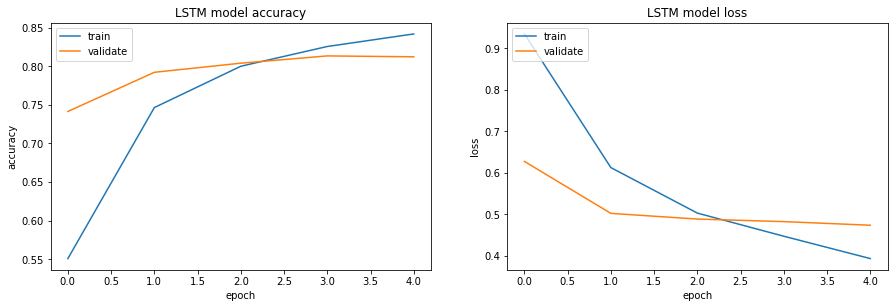

In [74]:
# Plot accuracy training dan validation set
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model_LSTM_history.history['accuracy'])
plt.plot(model_LSTM_history.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


plt.subplot(2, 2,2 )
plt.plot(model_LSTM_history.history['loss'])
plt.plot(model_LSTM_history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

plt.show()

In [75]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [76]:
y_pred = model_LSTM.predict(X_test)
model_LSTM_results = calculate_results(y_true=y_test.argmax(axis=1), 
                                    y_pred=y_pred.argmax(axis=1))
model_LSTM_results

{'accuracy': 81.38875767595654,
 'precision': 0.812726561280289,
 'recall': 0.8138875767595655,
 'f1': 0.8129953704876446}

# Model Inference LSTM

**inference score :**
- 0 = Negatif
- 1 = Netral
- 2 = Positive

In [77]:
# inference data baru

review_baru = [
            "aplikasinya jelek insentif susah cair..",
            "Saya kirim uang tetapi gagal dan katanya sudah di refund kembali, tetapi saya cek dri tdi malam tidak masuk ke saldo dana saya, saya tanya via wa tetapi sibuk, saya tanya via email tetapi tidak ada jawaban hanya katanya akan diproses 1x24 jam. Mohon dikembalikan uangnya karena saya butuh sekali uangnya Terima kasih",
            "di percepat lah pengembangan sistemnya,, baru aja pertama mau mendapatkan bantuan dari pemerintah lewat prakerja, malah zonk, jangan buat pada kecewa lah ya!!.",
            "cakep ni aplikasi, hanya saja program prakerja nya gajelas",
            "keren, bagus promonya banyak"
]

hasil = model_LSTM.predict(review_baru)
hasil.argmax(axis=1)

array([0, 0, 1, 1, 2], dtype=int64)

# GRU

In [78]:
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [79]:
# Coba memasukan data ke layer embedding
random_sentence = random.choice(train_sentences)
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Embedded:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Teks Asli:
mohon sangat hormat untuk upgrade ovo premium segera baik terimakasih      

Versi Embedded:


<tf.Tensor: shape=(1, 13, 128), dtype=float32, numpy=
array([[[ 0.03713024, -0.00830467, -0.03491595, ..., -0.01159447,
          0.0271122 ,  0.02687142],
        [ 0.00860338,  0.00224881, -0.02020195, ..., -0.02651335,
         -0.00837975,  0.01125037],
        [ 0.04377996,  0.0028635 , -0.03030207, ...,  0.02602161,
         -0.00054455,  0.01484432],
        ...,
        [-0.01852239, -0.00029224, -0.01495818, ...,  0.0239302 ,
         -0.03165151, -0.02837105],
        [-0.01852239, -0.00029224, -0.01495818, ...,  0.0239302 ,
         -0.03165151, -0.02837105],
        [-0.01852239, -0.00029224, -0.01495818, ...,  0.0239302 ,
         -0.03165151, -0.02837105]]], dtype=float32)>

In [80]:
# Buat Model LSTM
import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
keras.backend.clear_session()
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64, dropout=0.75, recurrent_dropout=0.75)(x)
x = layers.Dense(76)(x)
x = layers.Dropout(0.75)(x)
print(x.shape)
outputs = layers.Dense(3, activation="softmax")(x)
model_GRU = tf.keras.Model(inputs, outputs, name="model_calcbase_GRU")

(None, 13, 128)
(None, 76)


In [81]:
model_GRU.summary()

Model: "model_calcbase_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 13)                0         
_________________________________________________________________
embedding (Embedding)        (None, 13, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 76)                4940      
_________________________________________________________________
dropout (Dropout)            (None, 76)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)          

In [82]:
# Compile model
model_GRU.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [83]:
# Fit model
model_GRU_history = model_GRU.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
239/239 [==============================] - 7s 22ms/step - loss: 1.0620 - accuracy: 0.4280 - val_loss: 1.0333 - val_accuracy: 0.4545
Epoch 2/5
239/239 [==============================] - 5s 20ms/step - loss: 0.8041 - accuracy: 0.6505 - val_loss: 0.5734 - val_accuracy: 0.7839
Epoch 3/5
239/239 [==============================] - 5s 19ms/step - loss: 0.5901 - accuracy: 0.7608 - val_loss: 0.5201 - val_accuracy: 0.7910
Epoch 4/5
239/239 [==============================] - 5s 20ms/step - loss: 0.5028 - accuracy: 0.7995 - val_loss: 0.4980 - val_accuracy: 0.7969
Epoch 5/5
239/239 [==============================] - 5s 20ms/step - loss: 0.4597 - accuracy: 0.8171 - val_loss: 0.4745 - val_accuracy: 0.8135


In [84]:
# Buat prediksi
model_GRU_pred_probs = model_GRU.predict(val_sentences)
model_GRU_pred_probs[:10] # prediksi dari 10 data teratas

array([[3.3783130e-02, 9.5901340e-01, 7.2034807e-03],
       [5.4812981e-03, 3.0534400e-02, 9.6398431e-01],
       [1.1878491e-01, 5.7716113e-01, 3.0405393e-01],
       [9.9715805e-01, 2.6906095e-03, 1.5137233e-04],
       [5.8160315e-04, 5.5535631e-03, 9.9386483e-01],
       [7.0151843e-02, 8.6520660e-01, 6.4641580e-02],
       [8.1677377e-01, 1.0906098e-01, 7.4165270e-02],
       [9.7695841e-03, 9.8740047e-01, 2.8299359e-03],
       [5.2370280e-01, 2.3154956e-01, 2.4474764e-01],
       [1.0383723e-01, 8.9348090e-01, 2.6818337e-03]], dtype=float32)

In [85]:
model_GRU_pred_probs[:10].argmax(axis=1)

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1], dtype=int64)

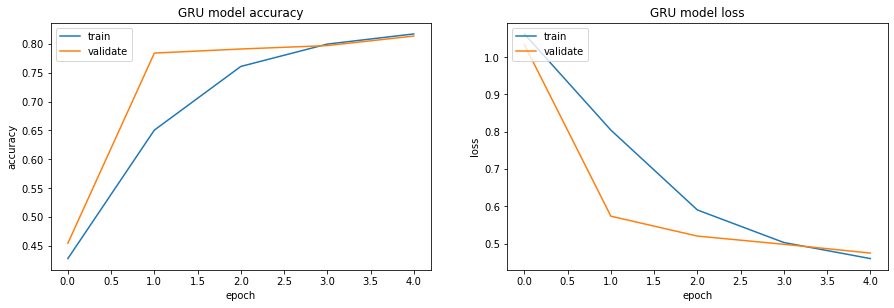

In [86]:
# Plot accuracy training dan validation set
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model_GRU_history.history['accuracy'])
plt.plot(model_GRU_history.history['val_accuracy'])
plt.title('GRU model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


plt.subplot(2, 2,2 )
plt.plot(model_GRU_history.history['loss'])
plt.plot(model_GRU_history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

plt.show()

In [87]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [88]:
y_pred = model_GRU.predict(X_test)
model_GRU_results = calculate_results(y_true=y_test.argmax(axis=1), 
                                    y_pred=y_pred.argmax(axis=1))
model_GRU_results

{'accuracy': 81.62494095418045,
 'precision': 0.8158632517291711,
 'recall': 0.8162494095418045,
 'f1': 0.8153288993471934}

# Model Inference GRU

**inference score :**
- 0 = Negatif
- 1 = Netral
- 2 = Positive

In [89]:
# inference data baru

review_baru = [
            "aplikasinya jelek insentif susah cair..",
            "Saya kirim uang tetapi gagal dan katanya sudah di refund kembali, tetapi saya cek dri tdi malam tidak masuk ke saldo dana saya, saya tanya via wa tetapi sibuk, saya tanya via email tetapi tidak ada jawaban hanya katanya akan diproses 1x24 jam. Mohon dikembalikan uangnya karena saya butuh sekali uangnya Terima kasih",
            "di percepat lah pengembangan sistemnya,, baru aja pertama mau mendapatkan bantuan dari pemerintah lewat prakerja, malah zonk, jangan buat pada kecewa lah ya!!.",
            "cakep ni aplikasi, hanya saja program prakerja nya gajelas",
            "keren, bagus promonya banyak"
]

hasil = model_GRU.predict(review_baru)
hasil.argmax(axis=1)

array([0, 0, 0, 1, 2], dtype=int64)

Dari hasil kedua model diatas yang di training dengan 5 epoch dan jumlah layer yang sama, dapat disimpulkan bahwa model gru adalah model yang terbaik dilihat dari akurasi dan lossnya yang lebih optimal dibandingkan dengan model LSTM walaupun keduanya adalah model dengan karakteristik yang sama yaitu bersifat sequential yang artinya kedua model memperhatikan setiap kata dalam trainingnya, serta dapat terlihat juga pada model inference nya bahwa komentar-komentar yang benar adanya bersentiment negatif pada model GRU akan secara objectif menebak negatif namun pada model LSTM terprediksi netral.

In [ ]:
#model_LSTM.save('model_lstm.tf', save_format='tf')
#model_GRU.save('model_gru.tf', save_format='tf')